# Analysis of cG(r)-in-time discretizations of the elastodynamics equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

t, k, A, B = symbols("t k A B")
init_printing()

In [2]:
# Choosing some value for the timestep size to visualize the basis functions
_k = 0.1
_t = np.linspace(0.,_k,100)

## Basis functions

### Q^0

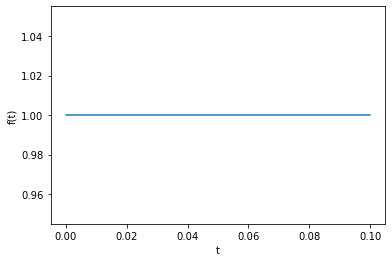

In [3]:
φ_0 = 1 + 0*Id(t)

# evaluate basis function at time points
φ_0_vals = np.zeros_like(_t)
for i in range(_t.shape[0]):
    φ_0_vals[i] = φ_0.evalf(subs={t: _t[i], k: _k})
plt.plot(_t, φ_0_vals)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()

### Q^1

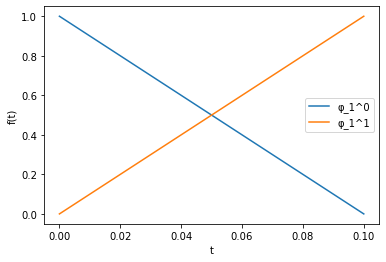

In [4]:
φ_1 = [1-t/k, t/k]

# evaluate basis functions at time points
φ_1_vals = [np.zeros_like(_t) for _ in range(len(φ_1))]
for n in range(len(φ_1)):
    for i in range(_t.shape[0]):
        φ_1_vals[n][i] = φ_1[n].evalf(subs={t: _t[i], k: _k})

for n in range(len(φ_1)):
    plt.plot(_t, φ_1_vals[n], label=f"φ_1^{n}")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.show()

### Q^2

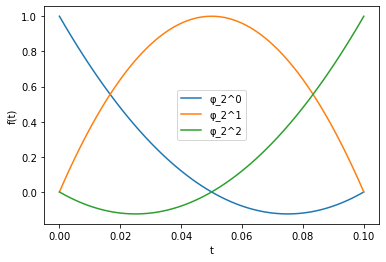

In [5]:
φ_2 = [(2/k**2)*(t-k/2)*(t-k), -(4/k**2)*t*(t-k), (2/k**2)*t*(t-k/2)]

# evaluate basis functions at time points
φ_2_vals = [np.zeros_like(_t) for _ in range(len(φ_2))]
for n in range(len(φ_2)):
    for i in range(_t.shape[0]):
        φ_2_vals[n][i] = φ_2[n].evalf(subs={t: _t[i], k: _k})

for n in range(len(φ_2)):
    plt.plot(_t, φ_2_vals[n], label=f"φ_2^{n}")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.show()

## Problem statement and Galerkin discretization

We consider the model problem
$$
\partial_t u(t) A_x + u(t) B_x = f(t) \qquad \forall t \in [0,T], \\
u(0)A_x  = u_0A_x.
$$
Using the Galerkin ansatz $u(t) = \sum_{i = 1}^N U_i \varphi_i(t)$ with $\varphi_i \in V$ and test functions $\psi \in \tilde{V}$, we solve the weak formulation
$$
(\partial_t u, \psi)A_x + (u, \psi)B_x = f \qquad \forall \psi \in \tilde{V},
$$
where $(f,g) := \int_0^T fg\ \mathrm{d}t$ denotes the $L^2$-inner product in time.
This can be rewritten as the linear equation system
$$
\begin{bmatrix}
  (\partial_t \varphi_1, \psi_1)A_x + (\varphi_1, \psi_1)B_x & (\partial_t \varphi_2, \psi_1)A_x + (\varphi_2, \psi_1)B_x & \dots & (\partial_t \varphi_N, \psi_1)A_x + (\varphi_N, \psi_1)B_x \\
  (\partial_t \varphi_1, \psi_2)A_x + (\varphi_1, \psi_2)B_x & (\partial_t \varphi_2, \psi_2)A_x + (\varphi_2, \psi_2)B_x & \dots & (\partial_t \varphi_N, \psi_2)A_x + (\varphi_N, \psi_2)B_x \\
  \vdots & \vdots & \ddots & \vdots \\
  (\partial_t \varphi_1, \psi_N)A_x + (\varphi_1, \psi_N)B_x & (\partial_t \varphi_2, \psi_N)A_x + (\varphi_2, \psi_N)B_x & \dots & (\partial_t \varphi_N, \psi_N)A_x + (\varphi_N, \psi_N)B_x
\end{bmatrix}
\begin{bmatrix}
U_1 \\
U_2 \\
\vdots \\
U_N
\end{bmatrix}
= \begin{bmatrix}
(f, \psi_1) \\
(f, \psi_2) \\
\vdots \\
(f, \psi_N)
\end{bmatrix}.
$$
Note that we must ensure that we use the same amount of ansatz functions $\varphi_i \in V$ and test functions $\psi_j \in \tilde{V}$ to ensure that the system matrix is a square matrix and uniquely solvable.

ALTERNATIVELY, one can also enforce the boundary conditions by adding them to the strong and variational formulation by considering the problem
$$
\partial_t u(t) A_x + u(t) B_x + u(0)A_x = f(t) + u_0A_x \qquad \forall t \in [0,T].
$$
For this the linear equation system reads
$$
\begin{bmatrix}
  (\partial_t \varphi_1, \psi_1)A_x + (\varphi_1, \psi_1)B_x + A_x & (\partial_t \varphi_2, \psi_1)A_x + (\varphi_2, \psi_1)B_x & \dots & (\partial_t \varphi_N, \psi_1)A_x + (\varphi_N, \psi_1)B_x \\
  (\partial_t \varphi_1, \psi_2)A_x + (\varphi_1, \psi_2)B_x & (\partial_t \varphi_2, \psi_2)A_x + (\varphi_2, \psi_2)B_x & \dots & (\partial_t \varphi_N, \psi_2)A_x + (\varphi_N, \psi_2)B_x \\
  \vdots & \vdots & \ddots & \vdots \\
  (\partial_t \varphi_1, \psi_N)A_x + (\varphi_1, \psi_N)B_x & (\partial_t \varphi_2, \psi_N)A_x + (\varphi_2, \psi_N)B_x & \dots & (\partial_t \varphi_N, \psi_N)A_x + (\varphi_N, \psi_N)B_x
\end{bmatrix}
\begin{bmatrix}
U_1 \\
U_2 \\
\vdots \\
U_N
\end{bmatrix}
= \begin{bmatrix}
(f, \psi_1) + U_0 A_x\\
(f, \psi_2) \\
\vdots \\
(f, \psi_N)
\end{bmatrix}.
$$

### cG(2) ansatz functions and cG(2) test functions with initial condition treated as type of boundary condition

The simplest approach would be to use the same function space for ansatz and test functions. More concretely, we want to use $cG(2)$ basis functions for both and later enforce the initial condition on the arising system.

In [7]:
matrix = []
for n in range(len(φ_2)):
    matrix.append([0.]*len(φ_2))
for i in range(len(φ_2)):
    for j in range(len(φ_2)):
        matrix[i][j]= integrate( diff(φ_2[j], t) * φ_2[i] * A + φ_2[j] * φ_2[i] * B, (t, 0, k) )
print(f"system matrix = {matrix}")

system matrix = [[-A/2 + 2*B*k/15, 2*A/3 + B*k/15, -A/6 - B*k/30], [-2*A/3 + B*k/15, 8*B*k/15, 2*A/3 + B*k/15], [A/6 - B*k/30, -2*A/3 + B*k/15, A/2 + 2*B*k/15]]


After enforcing the initial value, which clears the first row of the matrix, we arrive at the time stepping formulation:

In [27]:
print(f"({matrix[1][2]}) U_n+1 + ({matrix[1][1]}) U_n+1/2          = ({-matrix[1][0]}) U_n")
print(f"({matrix[2][2]}) U_n+1 + ({matrix[2][1]}) U_n+1/2   = ({-matrix[2][0]}) U_n")

(2*A/3 + B*k/15) U_n+1 + (8*B*k/15) U_n+1/2          = (2*A/3 - B*k/15) U_n
(A/2 + 2*B*k/15) U_n+1 + (-2*A/3 + B*k/15) U_n+1/2   = (-A/6 + B*k/30) U_n


Or in (pretty-formatted) matrix notation, we have:

In [25]:
print(f"({matrix[1][1]},         ({matrix[1][2]}) (U_n+1/2)   ({-matrix[1][0]}) ")
print(f"({matrix[2][1]},  ({matrix[2][2]}) (U_n+1)   = ({-matrix[2][0]} ) U_n")

(8*B*k/15,         (2*A/3 + B*k/15) (U_n+1/2)   (2*A/3 - B*k/15) 
(-2*A/3 + B*k/15,  (A/2 + 2*B*k/15) (U_n+1)   = (-A/6 + B*k/30 ) U_n


### cG(2) ansatz functions and cG(2) test functions with initial condition in weak form

In [10]:
matrix[0][0] += A
print(f"system matrix = {matrix}")

system matrix = [[A/2 + 2*B*k/15, 2*A/3 + B*k/15, -A/6 - B*k/30], [-2*A/3 + B*k/15, 8*B*k/15, 2*A/3 + B*k/15], [A/6 - B*k/30, -2*A/3 + B*k/15, A/2 + 2*B*k/15]]


As a time-stepping formulation this reads:

In [33]:
print(f"({matrix[0][2]}) U_n+1  + ({matrix[0][1]}) U_n+1/2 +  ({matrix[0][0]}) U_n = (F, phi_n+1/2) + U_old A")
print(f"({matrix[1][2]}) U_n+1 + ({matrix[1][1]}) U_n+1/2 +       ({matrix[1][0]}) U_n = (F, phi_n+1/2)")
print(f"({matrix[2][2]}) U_n+1 + ({matrix[2][1]}) U_n+1/2 +   ({matrix[2][0]}) U_n = (F, phi_n+1)")

(-A/6 - B*k/30) U_n+1  + (2*A/3 + B*k/15) U_n+1/2 +  (A/2 + 2*B*k/15) U_n = (F, phi_n+1/2) + U_old A
(2*A/3 + B*k/15) U_n+1 + (8*B*k/15) U_n+1/2 +       (-2*A/3 + B*k/15) U_n = (F, phi_n+1/2)
(A/2 + 2*B*k/15) U_n+1 + (-2*A/3 + B*k/15) U_n+1/2 +   (A/6 - B*k/30) U_n = (F, phi_n+1)


Or in (pretty-formatted) matrix notation, we have:

In [19]:
print(f"({matrix[0][0]},    {matrix[0][1]},    {matrix[0][2]}) (U_n)       (F, phi_n+1/2) + U_old A")
print(f"({matrix[1][0]},     {matrix[1][1]},       {matrix[1][2]}) (U_n+1/2) = (F, phi_n+1/2)")
print(f"({matrix[2][0]},     {matrix[2][1]},   {matrix[2][2]}) (U_n+1)     (F, phi_n+1)")

(A/2 + 2*B*k/15,    2*A/3 + B*k/15,    -A/6 - B*k/30) (U_n)       (F, phi_n+1/2) + U_old A
(-2*A/3 + B*k/15,     8*B*k/15,       2*A/3 + B*k/15) (U_n+1/2) = (F, phi_n+1/2)
(A/6 - B*k/30,     -2*A/3 + B*k/15,   A/2 + 2*B*k/15) (U_n+1)     (F, phi_n+1)
